#### Title: Uncovering the Sparkle: What Drives Diamond Prices? 💎📊

##### Brief Explanation: 
Dive into the world of diamonds with this predictive analytics project! Using Python, I explored the "diamonds" dataset to uncover how factors like clarity, color, and cut influence diamond prices. Through ANOVA tests, Chi-Square analysis, and visualizations like boxplots, the analysis reveals significant patterns—clarity and cut matter more than you might think! Perfect for data enthusiasts curious about blending stats with shiny insights. ✨ #DataScience #Python #Analytics

##### A brief itroduction of Descriptive Analytics 

Two things are very recurrent when aalyzing data, the mean (average) and the departure from the mean (in literal terms) measured by a metric called variance. *Before analyzing any data, you need to clearly state the goal of the analysis; there coould be three types of goals you can have:* 

- *interpretation* - this helps to understand phenomena and interpreting what the results of our model tell us. 
- *Inference* - this is about setting out the effect of a particular phenomena (based on your gut or unsd of the situation) and then using data to see if it supports your hypothesis. For example: 

• Claim: Increased advertising leads to higher sales
• Claim: Increased minimum wage leads to less unemployment
• Claim: More years of college education leads to higher income
• Claim: LEating vegatables keeps your body lin
All these axioms need to be proven with data. 

- *Prediction*: 
• How many customers will leave the company next year?
• Which party will hold the majority in the house and senate in two years everything being equal? 
• What are the chances that a new email is spam?
• Which clients will default on their loan given a set of parameters?

*For descriptive analytics*
- *Quantitative x Quantitative:* USE Correlation analysis
- *Quantitative x Categorical:* Use ANOVA which analyzes if the means vary widely across categories
- *Categorical x Categorical:* Use (Chi Square) Test of Independence which evaluate if values of one categorical variable values are associated with values from another (dependent) or not (independent)  

Much of the analysis done in predictive analytics is aboout mean and variance. The first of examples is something called ANOVA:: 

[A] *Analysis of variance (ANOVA) tests whether the mean of a given quantitative variable is the same between two or more categories or groups.*
• It compares the variance within each group against the variance of the means between groups.
• For example, if we want to test if the mileage is different between foreign and domestic cars, or if the price of a diamond is different for various color classifications, we can do an ANOVA test.

*RULE* :: Is the [numerical/quant measure] different for [categorical var with levels]? 
To solve problems using ANOVA, *visually inspection (using boxplots)* and *statistical test.* 


[B] *Chi-squared test of independence* ~ *Categorical vs categoorical variable* 

Suppose that you want to *test the effectiveness* of *two donation campaigns A and B*, on driving donations ?!

• The most common way to test whether two categorical variables are related (one influences the other) or independent (no influence) is with a Chi Square Test of Independence
• The first step is to cross-tabulate the data with Donation (yes or no) as rows and Campaign (A or B) as columns and enter the respective counts in the cells.
• Then run a Chi Square test on the cross table

[C] *Correlation*
Lets illustrate this using the motor trend car road tests data, extracted from 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobiles design and performance for 32 automibiles. 

*ANOVA*
There are 2 popular functions to do ANOVA tests: `aov()` and `anova()` in R

*## The aov() Function*

The `aov()` function is useful to compare the means of a continuous variable (e.g., price) across various categories (e.g. color,clarity). In this example, we look at what influences the price of diamonds given some parameters. 
Qn: What does the price of diamond depend on? Lets explore this together. We begin by exploring the dataset 'diamonds' 

In [1]:
# For data manipulation
import pandas as pd
import numpy as np
import seaborn as sns # contains diamonds dataset

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [10]:
# Import the diamonds dataset
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


#### Does clarity of diamond affect its price? 
##### Single factor ANOVA: price ~ clarity

In [32]:

model_clarity = ols('price ~ clarity', data=diamonds).fit()
anova_clarity = sm.stats.anova_lm(model_clarity, typ=2)
print("ANOVA for price ~ clarity:")
print(anova_clarity)

ANOVA for price ~ clarity:
                sum_sq       df          F         PR(>F)
clarity   2.330780e+10      7.0  215.01926  1.919090e-316
Residual  8.351653e+11  53932.0        NaN            NaN


#### Two factors ANOVA: price ~ clarity + color

In [33]:
model_two_factors = ols('price ~ clarity + color', data=diamonds).fit()
anova_two_factors = sm.stats.anova_lm(model_two_factors, typ=2)
print("\nANOVA for price ~ clarity + color:")
print(anova_two_factors)


ANOVA for price ~ clarity + color:
                sum_sq       df           F  PR(>F)
clarity   2.412251e+10      7.0  230.133190     0.0
color     2.766381e+10      6.0  307.904246     0.0
Residual  8.075015e+11  53926.0         NaN     NaN


##### Three factors ANOVA: price ~ clarity + color + cut

In [19]:
model_three_factors = ols('price ~ clarity + color + cut', data=diamonds).fit()
anova_three_factors = sm.stats.anova_lm(model_three_factors, typ=2)
print("\nANOVA for price ~ clarity + color + cut:")
print(anova_three_factors)


ANOVA for price ~ clarity + color + cut:
                sum_sq       df           F         PR(>F)
clarity   1.999776e+10      7.0  192.094409  1.300774e-282
color     2.659499e+10      6.0  298.043761   0.000000e+00
cut       5.574933e+09      4.0   93.715424   1.424346e-79
Residual  8.019266e+11  53922.0         NaN            NaN


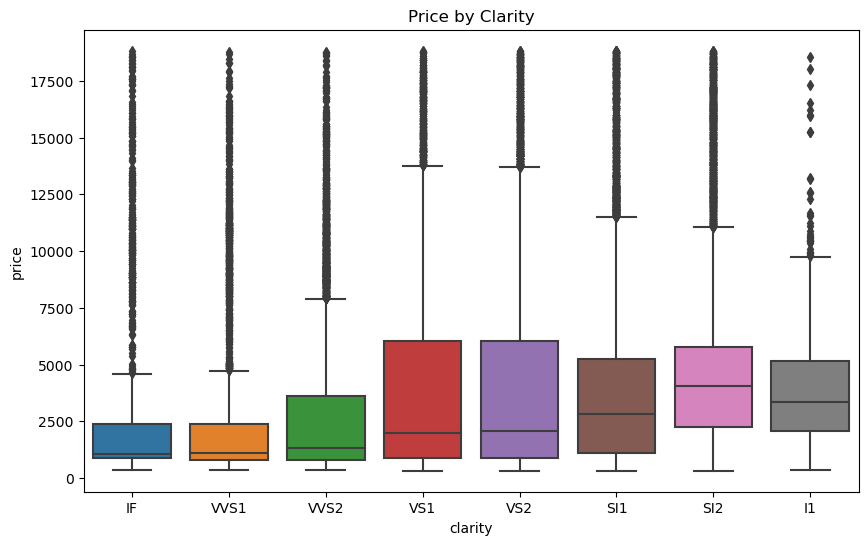

In [29]:
# --- Visualizations with boxplots ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=diamonds)
plt.title('Price by Clarity')
plt.show()

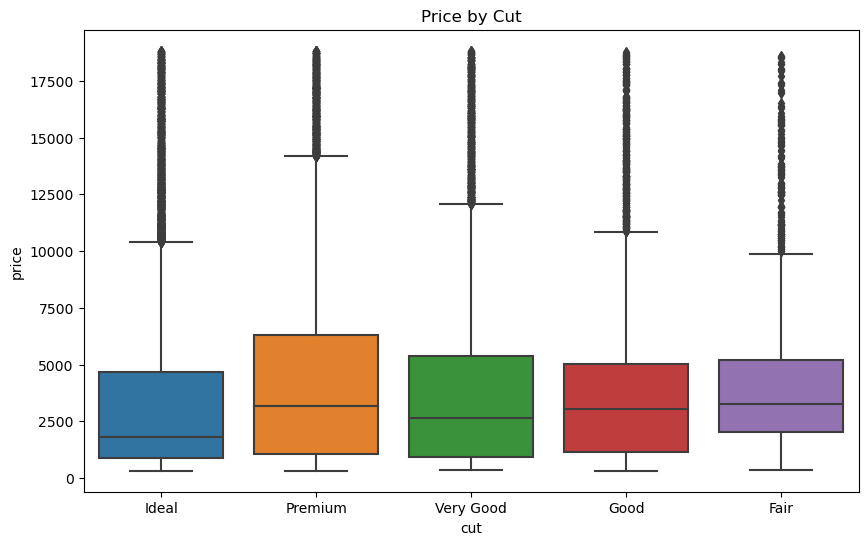

In [39]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=diamonds)
plt.title('Price by Cut')
plt.show()

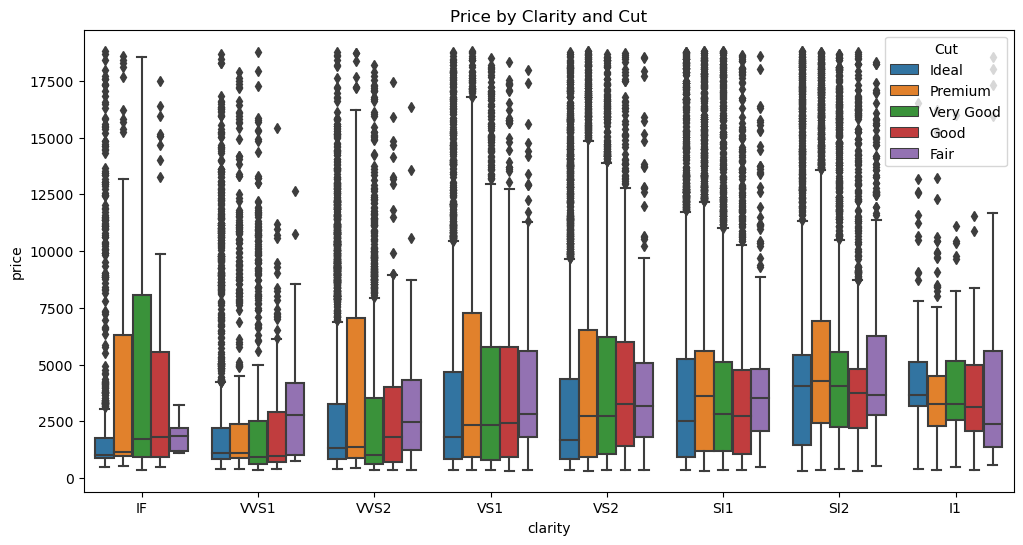

In [40]:

# Combined clarity and cut (interpreted as grouped boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='clarity', y='price', hue='cut', data=diamonds)
plt.title('Price by Clarity and Cut')
plt.legend(title='Cut')
plt.show()

 One model is nested withing another if the larger models contains all the predictors of the small model. Let's fit 3 nested regression models with the diamonds data set and price as the outcome variable. *The first model is the null model with no predictors (`~ 1` in the model indicates the intercept as the only predictor*, and in this case nothing else). The second model is a simple linear regression model with a single predictors, and the last has 2 predictors.

In [38]:
# --- Comparing Nested Models with anova() equivalent ---
lm_null = ols('price ~ 1', data=diamonds).fit()
lm_small = ols('price ~ carat', data=diamonds).fit()
lm_large = ols('price ~ carat + clarity', data=diamonds).fit()

anova_nested = anova_lm(lm_null, lm_small, lm_large)
print("\nANOVA comparison of nested models:")
print(anova_nested)


ANOVA comparison of nested models:
   df_resid           ssr  df_diff       ss_diff              F  Pr(>F)
0   53939.0  8.584731e+11      0.0           NaN            NaN     NaN
1   53938.0  1.293457e+11      1.0  7.291274e+11  435639.857696     0.0
2   53931.0  9.026394e+10      7.0  3.908175e+10    3335.801011     0.0


Interpretation 
The first ANOVA test compares the second model to the first in the `ols()` function. The second ANOVA test compares the thirds model to the second.* You can test as many nested models as you wish in one pass. 
- *The first p-value is significant, so the small model has significantly more explanatory power than the null model*. 
- The second p-value is also significant, so the large model has more explanatory power than the small model. 
- In other words, 'carats' explain more variance in price of diamonds than just the mean price, but adding 'clarity' as a predictor improves the explanatory power over the small model.

####  Chi-Square Test of Independence
To investigate if diamond "cut" and "color" are independent (i.e. one does not affect the value of the other) or if they are dependent (i.e., the value of one variable influences the value of another), we use Chi-Squared test since these are all categorical variables. 
Ho: The diamond "cut" and "color" have no effect on each other
Ha: The diamond "cut" and "color" affect each other

The first step is to prepare a cross table with the counts for both categories


In [41]:
# Create contingency table
cross_table = pd.crosstab(diamonds['cut'], diamonds['color'])
print("\nCross Table (Observed Frequencies):")
print(cross_table)

# Margin totals
row_sums = cross_table.sum(axis=1)
col_sums = cross_table.sum(axis=0)
total_sum = cross_table.values.sum()
print("\nRow Sums:")
print(row_sums)
print("\nColumn Sums:")
print(col_sums)
print("\nTotal Sum:", total_sum)


Cross Table (Observed Frequencies):
color         D     E     F     G     H     I    J
cut                                               
Ideal      2834  3903  3826  4884  3115  2093  896
Premium    1603  2337  2331  2924  2360  1428  808
Very Good  1513  2400  2164  2299  1824  1204  678
Good        662   933   909   871   702   522  307
Fair        163   224   312   314   303   175  119

Row Sums:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
dtype: int64

Column Sums:
color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
dtype: int64

Total Sum: 53940


In [43]:
# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(cross_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(pd.DataFrame(expected, index=cross_table.index, columns=cross_table.columns))


Chi-Square Test Results:
Chi-Square Statistic: 310.3179005211542
p-value: 1.3945120919852248e-51
Degrees of Freedom: 24
Expected Frequencies:
color                D            E            F            G            H  \
cut                                                                          
Ideal      2706.859937  3914.259307  3812.377494  4511.566407  3317.751279   
Premium    1732.184372  2504.828087  2439.631479  2887.059177  2123.108343   
Very Good  1517.529663  2194.426288  2137.308936  2529.290768  1860.009789   
Good        616.205970   891.065666   867.872673  1027.040267   755.272970   
Fair        202.220059   292.420653   284.809418   337.043382   247.857620   

color                I            J  
cut                                  
Ideal      2166.287023  1121.898554  
Premium    1386.258843   717.929700  
Very Good  1214.471709   628.962848  
Good        493.146681   255.395773  
Fair        161.835743    83.813126  


INterpretation

The p-value is significant, so we reject the null hypothesis that cut and color are independent and conclude that they are dependent (i.e., they co-vary) and both influence the price of diamonds. 